<a href="https://colab.research.google.com/github/oshin-verma/netflix-content-strategy-analysis/blob/main/Netflix_content_strategy_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('netflix_content_2023.csv')

In [ ]:
df.head(5)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [ ]:
#begin with data cleaning and preprocessing

In [ ]:
df['Hours Viewed']=df['Hours Viewed'].replace(',','',regex=True).astype(float)

In [ ]:
df

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie
...,...,...,...,...,...,...
24807,We Are Black and British: Season 1,No,NaN,100000.0,English,Show
24808,Whitney Cummings: Can I Touch It?,Yes,2019-07-30,100000.0,English,Movie
24809,Whitney Cummings: Jokes,No,2022-07-26,100000.0,English,Movie
24810,"Whose Vote Counts, Explained: Limited Series",Yes,2020-09-28,100000.0,English,Movie


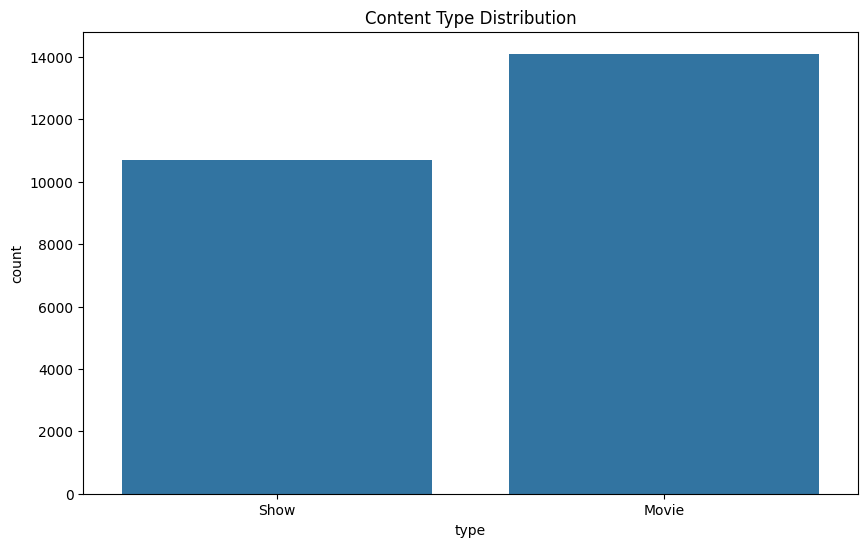

In [ ]:
#I’ll analyze trends in content type to determine whether shows or movies dominate viewership
plt.figure(figsize=(10,6))
sns.countplot(x='Content Type',data=df)
plt.xlabel('type')
plt.ylabel('count')
plt.title('Content Type Distribution')
plt.show()

In [ ]:
#aggregate  viewership hours by content type

In [ ]:
content_type_viewership=df.groupby('Content Type')['Hours Viewed'].sum()


Text(0.5, 1.0, 'Total Hours Viewed by Content Type')

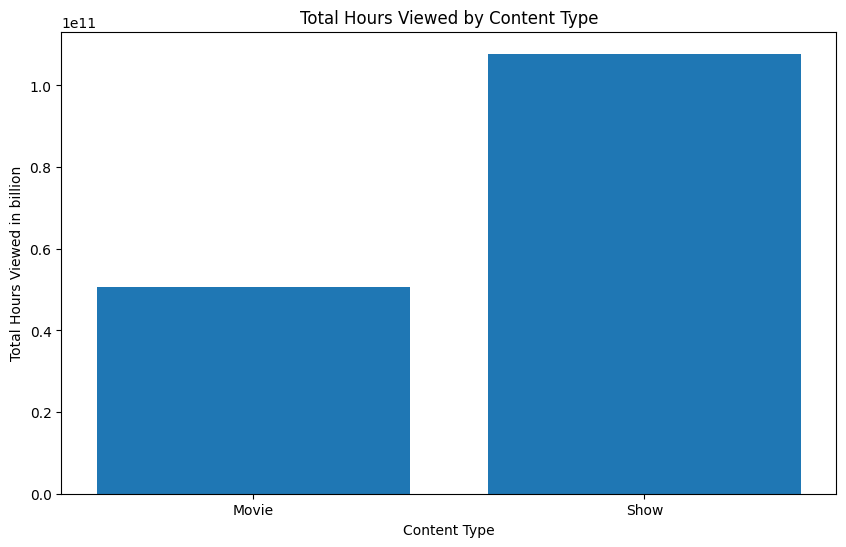

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(content_type_viewership.index,content_type_viewership.values)
plt.xlabel('Content Type')
plt.ylabel('Total Hours Viewed in billion')
plt.title('Total Hours Viewed by Content Type')

In [ ]:
#The visualization indicates that shows dominate the total viewership hours on Netflix in 2023
compared to movies. This suggests that Netflix’s content strategy leans heavily toward shows,
as they tend to attract more watch hours overall.

In [ ]:
lets aggregate viewership hours by language indicator to find which language
 contribute most to Netflix content consumption

In [ ]:
language_viewership=df.groupby('Language Indicator')['Hours Viewed'].sum()

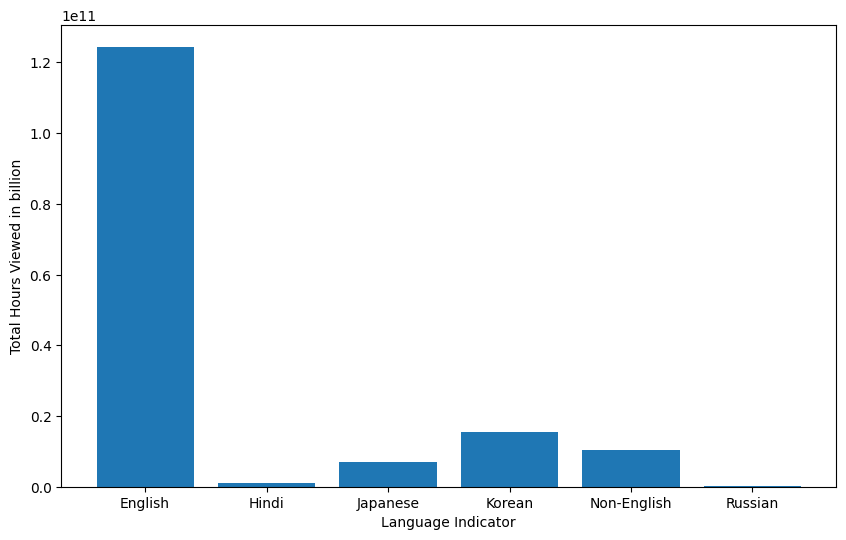

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(language_viewership.index,language_viewership.values)
plt.xlabel('Language Indicator')
plt.ylabel('Total Hours Viewed in billion')
plt.show()

In [ ]:
#The visualization reveals that English-language content significantly dominates
Netflix’s viewership, followed by other languages like Korean. It indicates that
Netflix’s primary audience is consuming English content, although non-English shows and movies also have a considerable viewership share, which shows a diverse content strategy.

In [ ]:
#we will analyze trend over time.see how viewership varies with release date

In [ ]:
df['Release Date']=pd.to_datetime(df['Release Date'])
df['Realease Month']=df['Release Date'].dt.month



In [ ]:
monthly_viewership=df.groupby('Realease Month')['Hours Viewed'].sum()

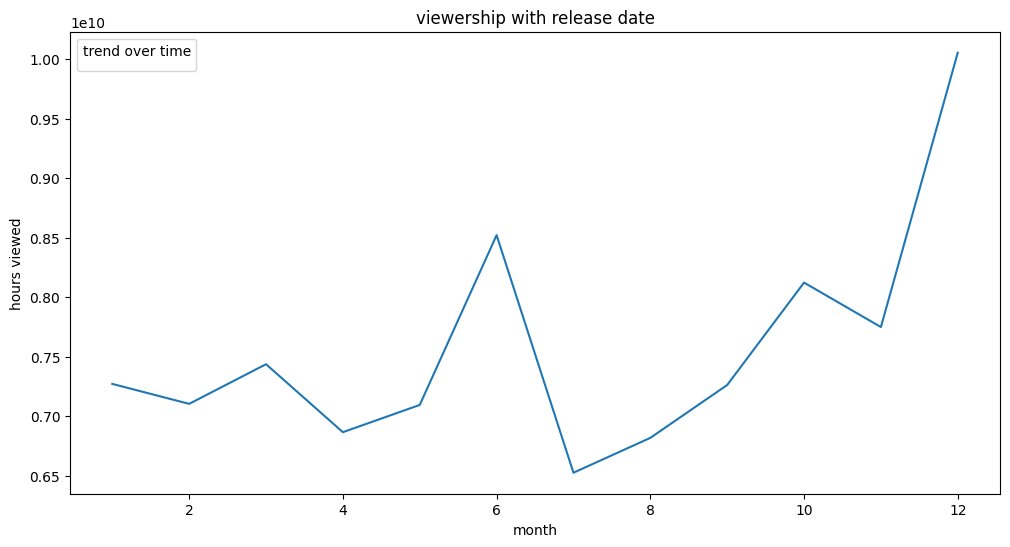

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_viewership.index,y=monthly_viewership.values)
plt.xlabel('month')
plt.ylabel('hours viewed')
plt.title('viewership with release date')
plt.legend(title='trend over time')
plt.show()

In [ ]:
#The graph shows the total viewership hours by month, which reveals a notable increase in viewership during June and a sharp rise toward the end of the year in December. It suggests that Netflix experiences spikes in audience engagement during these periods, possibly due to strategic content releases, seasonal trends, or holidays, while the middle months have a steady but lower viewership pattern.

In [ ]:
#Viewership trend by content type and release month

In [ ]:
df['Release Date']=pd.to_datetime(df['Release Date'])
df.dropna(subset=['Release Date'] ,inplace=True)

In [ ]:
df['Realease Month']=df['Release Date'].dt.month

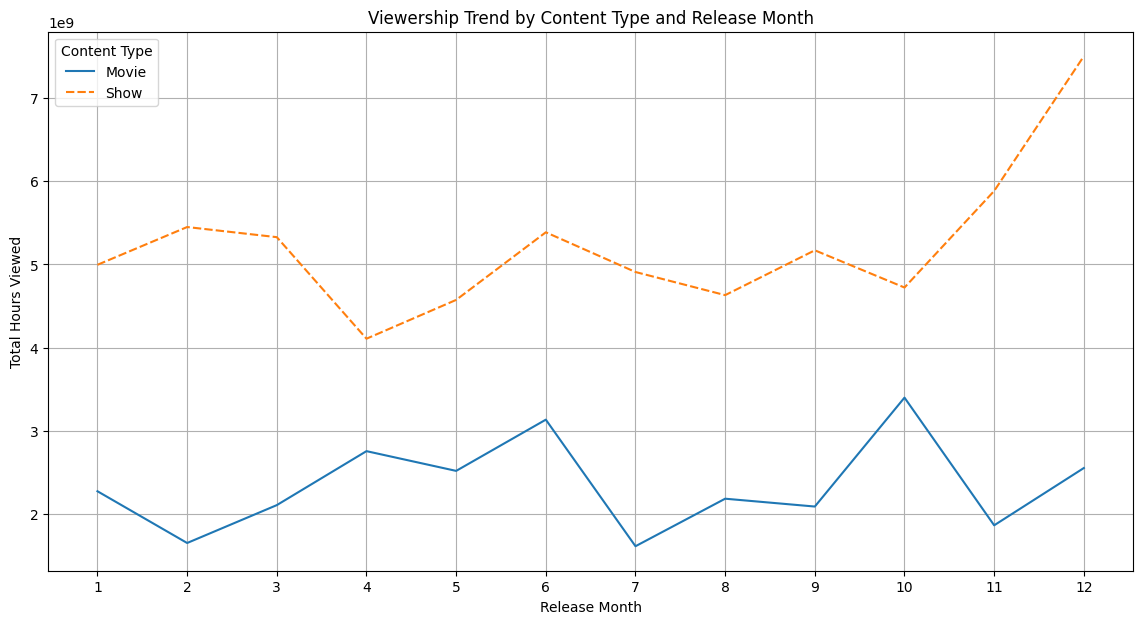

In [ ]:
#Viewership trend by content type and release month
#aggregate viewership hours by month and content type
content_type_monthly_viewership = df.groupby(['Realease Month', 'Content Type'])['Hours Viewed'].sum().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
# Plot a line for each content type over the months
sns.lineplot(data=content_type_monthly_viewership)
plt.xlabel('Release Month')
plt.ylabel('Total Hours Viewed')
plt.title('Viewership Trend by Content Type and Release Month')
plt.xticks(ticks=content_type_monthly_viewership.index) # Ensure all months are shown as ticks
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

In [ ]:
#The graph compares viewership trends between movies and shows throughout 2023. It shows that shows
 consistently have higher viewership than movies, peaking in December. Movies have more fluctuating
 viewership, with notable increases in June and October. This indicates that Netflix’s audience
 engages more with shows across the year, while movie viewership experiences occasional spikes,
  possibly linked to specific releases or events.

In [ ]:
top5=df.nlargest(5,'Hours Viewed')
top5

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Realease Month
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,3
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,1
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,630200000.0,Korean,Movie,6
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,12
18214,ONE PIECE: Season 1,Yes,2023-08-31,541900000.0,English,Show,8


In [ ]:
#total viewership hours distributed across different release seasons

In [ ]:
def get_season(month):
  if month in [12,1,2,]:
   return 'winter'
def get_season(month):
  if month in [12,1,2,]:
   return 'winter'
  elif month in [3,4,5,6]:
   return 'spring'
  elif month in [7,8,9]:
    return 'summer'
  else:
    return 'fall'


In [ ]:
df['release season']=df['Realease Month'].apply(get_season)

In [ ]:
season_viewership=df.groupby('release season')['Hours Viewed'].sum()

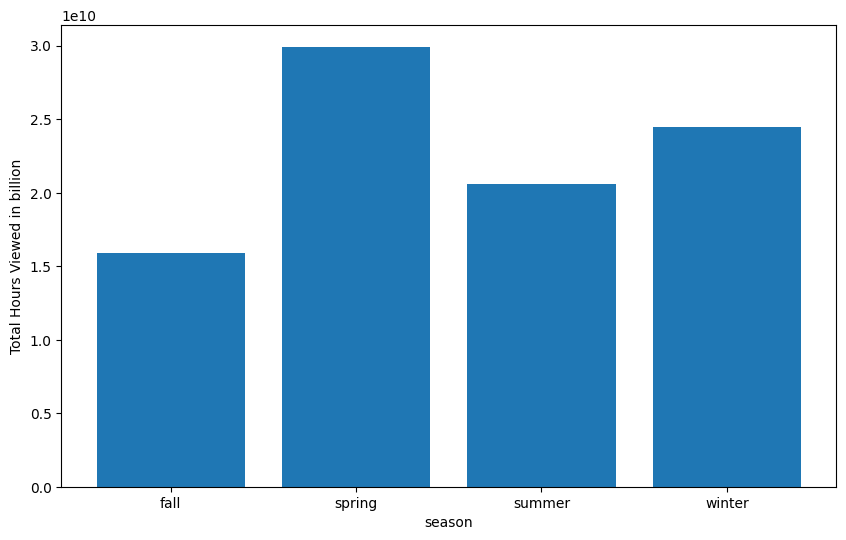

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(season_viewership.index,season_viewership.values)
plt.xlabel('season')
plt.ylabel('Total Hours Viewed in billion')
plt.show()

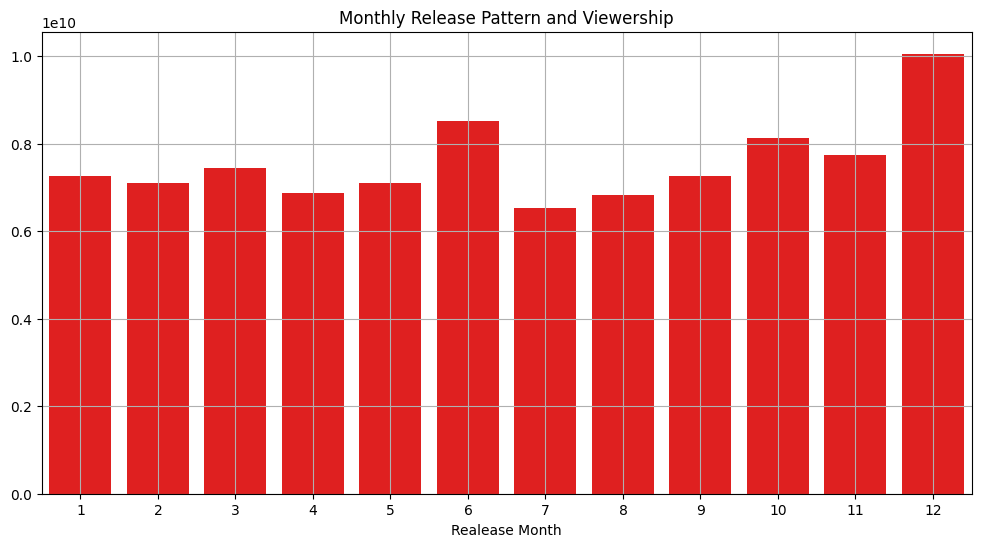

In [ ]:


#Aggregate viewership hours by release month
monthly_viewership = df.groupby('Realease Month')['Hours Viewed'].sum()

#create subplots
fig,ax1=plt.subplots(figsize=(12,6))



sns.barplot(x=monthly_viewership.index,y=monthly_viewership.values,color='red')
ax2.set_ylabel('Total Hours Viewed',color='red')
ax2.tick_params(axis='y',labelcolor='red')

plt.title('Monthly Release Pattern and Viewership')
plt.grid(True)
plt.show()

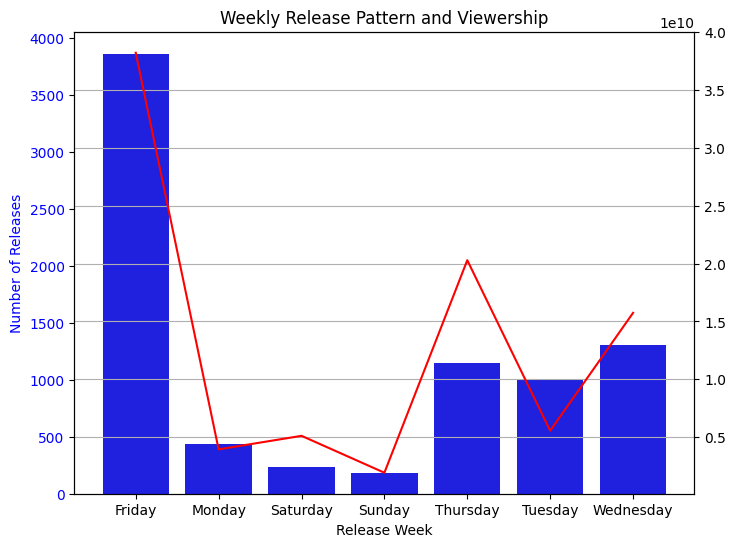

In [ ]:
# Analyze the weekly release pattern and viewership
# Convert 'Release Date' to datetime objects
df['Release Date'] = pd.to_datetime(df['Release Date'])
df.dropna(subset=['Release Date'] ,inplace=True)

# Extract the week of the year
df['Release Week'] = df['Release Date'].dt.day_name()

# Aggregate content count by release week
weekly_release_count = df.groupby('Release Week').size()

# Aggregate viewership hours by release week
weekly_viewership = df.groupby('Release Week')['Hours Viewed'].sum()

# Create subplots
fig, ax1 = plt.subplots(figsize=(8, 6)) # Increased figure size for more weeks

# Plot weekly release count on the first axis
sns.barplot(x=weekly_release_count.index, y=weekly_release_count.values, ax=ax1, color='blue')
ax1.set_xlabel('Release Week')
ax1.set_ylabel('Number of Releases', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

# Use sns.lineplot instead of plt.lineplot
sns.lineplot(x=weekly_viewership.index, y=weekly_viewership.values, ax=ax2, color='red')


plt.title('Weekly Release Pattern and Viewership')
plt.grid(True)
plt.show()

In [ ]:
The graph highlights that most content releases occur on Fridays, with viewership hours also peaking
significantly on that day. This suggests that Netflix strategically releases content toward the weekend
 to maximize audience engagement. The viewership drops sharply on Saturdays and Sundays, despite some
 releases, indicating that the audience tends to consume newly released content right at the start of
  the weekend, which makes Friday the most impactful day for both releases and viewership.

In [ ]:
CONCLUSION
content strategy of Netflix revolves around maximizing viewership through targeted release timing and content variety. Shows consistently outperform movies in viewership, with significant spikes in December and June, indicating strategic releases around these periods. The Fall season stands out as the peak time for audience engagement. Most content is released on Fridays, which aims to capture viewers right before the weekend, and viewership aligns strongly with this release pattern. While the number of releases is steady throughout the year, viewership varies, which suggests a focus on high-impact titles and optimal release timing over sheer volume.